In [1]:
import geopandas as gpd
from keplergl import KeplerGl
import json

In [2]:
from OpenCity import OpenCity

In [3]:
state_fips='25'
year=2018
state=OpenCity.US_State(state_fips=state_fips, year=year)

In [4]:
try:
    bg=gpd.read_file('zip://../data/shape/cb_2019_{}_bg_500k.zip'.format(state_fips))
    bg=bg.set_index('GEOID10')
except:
    state.get_geometry()
    bg=state.return_geometry()
bg = bg.to_crs("EPSG:4326")

Getting geometry (block_group) for state: Massachusetts


/home/doorleyr/CS_ESG_Community_Metrics/notebooks/OpenCity/OpenCity.py:72: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids=self.geom['geometry'].centroid


In [5]:
try:
    rac=pd.read_csv('../data/lodes/rac_{}_{}'.format(state_fips, year))
    rac['h_geoid']=rac.apply(lambda row: str(row['h_geoid']).zfill(12), axis=1)
    rac=rac.set_index('h_geoid')
    
    wac=pd.read_csv('../data/lodes/wac_{}_{}'.format(state_fips, year))
    wac['w_geoid']=wac.apply(lambda row: str(row['w_geoid']).zfill(12), axis=1)
    wac=wac.set_index('w_geoid')
except:
    state.get_lodes_data(include=['rac', 'wac'])
    rac=state.rac
    wac=state.wac
    wac.to_csv('../data/lodes/wac_{}_{}'.format(state_fips, year))
    rac.to_csv('../data/lodes/rac_{}_{}'.format(state_fips, year))

Getting WAC data from https://lehd.ces.census.gov/data/lodes/LODES7/
	 Formatting WAC data
Getting RAC data from https://lehd.ces.census.gov/data/lodes/LODES7/
	 Formatting RAC data


In [6]:
try:
    od=pd.read_csv('../data/lodes/od_{}_{}'.format(state_fips, year))
    od['h_geoid']=od.apply(lambda row: str(row['h_geoid']).zfill(12), axis=1)
    od['w_geoid']=od.apply(lambda row: str(row['w_geoid']).zfill(12), axis=1)
    od=od.set_index(['h_geoid', 'w_geoid'])
except:
    state.get_lodes_data(include=['od'])
    od=state.od
    od.to_csv('../data/lodes/od_{}_{}'.format(state_fips, year))

Getting OD data from https://lehd.ces.census.gov/data/lodes/LODES7/
	 Formatting OD data


In [7]:
bg_to_walkable_bg=json.load(open('../outputs/{}/bg_to_walkable_bg_osrm_{}.json'.format(
    state_fips, state_fips)))

In [20]:
# bg_to_walkable_bg.keys()

Analyze a walkable area in detail

In [9]:
# focus_bg='060816119002'
focus_bg='250277304011'

In [10]:
walkable=bg_to_walkable_bg[focus_bg]
walkable_bgs=bg.loc[walkable]
walkable_bgs.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,x_centroid,y_centroid
GEOID,,,,,,,,,,,,,,
250277304011,25,027,730401,1,Block Group 1,G5030,S,360020,0,+42.3030995,-071.7835260,"POLYGON ((-71.78563 42.30372, -71.78547 42.303...",-71.781259,42.300436
250277302004,25,027,730200,4,Block Group 4,G5030,S,312835,0,+42.3036924,-071.7870075,"POLYGON ((-71.78959 42.30367, -71.78956 42.304...",-71.787007,42.303692


Build simulation with daytime pop of walkable area

(-71.78960000000001, 42.292032999999996, -71.776958, 42.308105)
[42.30043631099677 -71.78125948237047]


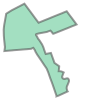

In [23]:
outline=walkable_bgs.unary_union
bounds_all=outline.bounds
print(bounds_all)
centre_lat_lon=bg.loc[focus_bg, ['y_centroid', 'x_centroid']].values
print(centre_lat_lon)
outline

In [25]:
G=osmnx.graph.graph_from_point(centre_lat_lon, dist=1200, dist_type='bbox', network_type='all_private')

In [13]:
# buildings=osmnx.geometries.geometries_from_polygon(outline, tags = {
#     'building':True
# })

In [16]:
map_blds = KeplerGl(height=400, data={"blds": buildings})
map_blds

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'blds':          unique_id      osmid element_type  \
0    way/214172359  214172359          wa…

In [19]:
map_blds.config

{'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['blds'],
     'id': '6efv52t8h',
     'name': ['element_type'],
     'type': 'multiSelect',
     'value': ['way'],
     'enlarged': False,
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None}],
   'layers': [{'id': 'mfg6o1',
     'type': 'geojson',
     'config': {'dataId': 'blds',
      'label': 'blds',
      'color': [30, 150, 190],
      'columns': {'geojson': 'geometry'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'strokeOpacity': 0.8,
       'thickness': 0.5,
       'strokeColor': [137, 218, 193],
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#